In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import numpy as np
# import tensorflow_transform as tft

# %cd /content/gdrive/My Drive/github_project/posts/HowToDoDeepLearningOnGraphsWithGraphConvolutionalNetworks/Part2_SemiSupervisedLearningWithSpectralGraphConvolutions/


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
print(tf.__version__)
!pip install tensorflow-transform

In [ ]:
a = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_1.npy')
print(a.shape)
a = np.reshape(a,(150,30,116,116))  #提供训练数据中的邻接矩阵

b = np.load('/content/gdrive/My Drive/strength/nonflipped/keep_30/three/1.npy')
print(b.shape)
b = np.reshape(b,(150,30,116,1))  #训练数据

c = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/1.npy')  #训练数据的label


f = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_2.npy')
f = np.reshape(a,(150,30,116,116))  #提供测试数据中的邻接矩阵

d = np.load('/content/gdrive/My Drive/strength/nonflipped/keep_30/three/2.npy')
d = np.reshape(b,(150,30,116))
d = np.reshape(b,(150,30,116,1))  #测试输入数据

e = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/2.npy')  #测试数据的label


(30, 150, 116, 116)
(30, 150, 116)


In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10


#训练邻接矩阵 a
tmp = order[0]
A = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(tmp)+ '.npy')
A = np.reshape(A,(150,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(i)+ '.npy')
  a = np.reshape(a,(150,30,116,116))
  A = np.concatenate((A,a), axis = 0)

a = A
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)

#训练强度 b
tmp = order[0]
B = np.load('/content/gdrive/My Drive/strength/nonflipped/keep_30/three/' + str(tmp)+ '.npy')
B = np.reshape(B,(150,30,116,1))
for i in order[1:18]: 
  b = np.load('/content/gdrive/My Drive/strength/nonflipped/keep_30/three/' + str(i)+ '.npy')
  b = np.reshape(b,(150,30,116,1))
  B = np.concatenate((B,b), axis = 0)
b = B
print(B.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,1)

#训练输出label c 
tmp = order[0]
C = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(tmp)+ '.npy')
for i in order[1:18]: 
  c = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i)+ '.npy')
  C = np.concatenate((C,c), axis = 0)
c = C
print(C.shape)
# 前十八个 病人数据做训练label(2700, 2)


#测试邻接矩阵 f
tmp = order[18]
F = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(tmp)+ '.npy')
F = np.reshape(F,(150,30,116,116))
for i in order[19:]: 
  f = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(i)+ '.npy')
  f = np.reshape(f,(150,30,116,116))
  F = np.concatenate((F,f), axis = 0)
f = F
print(F.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

# 测试强度 d
tmp = order[18]
D = np.load('/content/gdrive/My Drive/strength/nonflipped/keep_30/three/' + str(tmp)+ '.npy')
D = np.reshape(D,(150,30,116,1))
for i in order[19:]: 
  d = np.load('/content/gdrive/My Drive/strength/nonflipped/keep_30/three/' + str(i)+ '.npy')
  d = np.reshape(d,(150,30,116,1))
  D = np.concatenate((D,d), axis = 0)
d = D
print(D.shape)
# 后六个人 病人数据做测试label(900, 30, 116,,1)

#测试输出label  e
tmp = order[18]
E = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(tmp)+ '.npy')
for i in order[19:]: 
  e = np.load('/content/gdrive/My Drive/Newdata/ordered_by_patient/two_labels/' + str(i)+ '.npy')
  E = np.concatenate((E,e), axis = 0)
e = E
print(E.shape)
# 后六个人 病人数据做测试label(900, 2)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

# train_data = A
# train_label = B
# test_data = C
# test_label = D

# train_data = np.reshape(train_data,(2700,30,116,1))
# test_data = np.reshape(test_data,(900,30,116,1)) 

# print(train_data.shape)
# print(train_label.shape)
# print(test_data.shape)
# print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 30, 116, 116)
(2700, 30, 116, 1)
(2700, 2)
(900, 30, 116, 116)
(900, 30, 116, 1)
(900, 2)


In [ ]:
tf.compat.v1.disable_eager_execution()
# This function can only be called before any Graphs, Ops, or Tensors have been created.
#  It can be used at the beginning of the program for complex migration projects from TensorFlow 1.x to 2.x.

x = tf.compat.v1.placeholder('float',shape=(None,116,1)) #训练输入
y = tf.compat.v1.placeholder('float',shape=(None,2)) #训练输出
z = tf.compat.v1.placeholder('float',shape=(None,116,1))#测试输入 
A = tf.compat.v1.placeholder('float',shape=(None,116,116))
B = tf.compat.v1.placeholder('float',shape=(None,116,116))
w1 = tf.compat.v1.Variable(tf.random.normal([1,2]))
w2 = tf.compat.v1.Variable(tf.random.normal([10,5]))
w3 = tf.compat.v1.Variable(tf.random.normal([5,2]))
w_out = tf.compat.v1.Variable(tf.random.normal([2,1]))

diagonal = tf.ones([116], tf.float32) #用tensor运算
I = tf.linalg.diag(diagonal)   #创建单位矩阵 




In [ ]:
# w1 = tf.Variable(tf.random.normal([1,2]))
# w2 = tf.Variable(tf.random.normal([10,5]))
# w3 = tf.Variable(tf.random.normal([5,2]))
# w_out = tf.Variable(tf.random.normal([2,1]))
diagonal = tf.ones([116], tf.float32) #用tensor运算
I = tf.linalg.diag(diagonal)   #创建单位矩阵 
print(I.shape)

(116, 116)


In [ ]:
# Create a custom layer for part of the model
class CustomLayer(tf.keras.layers.Layer):
  def __init__(self,num_output):
    super(CustomLayer, self).__init__()
    self.num_output = num_output

  # def build(self,num_inputs):
    self.w1 = self.add_weight(
        shape=([1,2]),
        dtype=tf.float32,
        initializer=tf.keras.initializers.RandomNormal(),
        regularizer=tf.keras.regularizers.l2(0.02),
        trainable=True)
    # self.w2 = self.add_weight(
    #     shape=([10,5]),
    #     dtype=tf.float32,
    #     initializer=tf.keras.initializers.RandomNormal(),
    #     regularizer=tf.keras.regularizers.l2(0.02),
    #     trainable=True)
    # self.w3 = self.add_weight(
    #     shape=([5,2]),
    #     dtype=tf.float32,
    #     initializer=tf.keras.initializers.RandomNormal(),
    #     regularizer=tf.keras.regularizers.l2(0.02),
    #     trainable=True)
    self.w_out = self.add_weight(
        shape=([2,1]),
        dtype=tf.float32,
        initializer=tf.keras.initializers.RandomNormal(),
        regularizer=tf.keras.regularizers.l2(0.02),
        trainable=True)
    self.dense1 = tf.keras.layers.Dense(116)
    self.dense2 = tf.keras.layers.Dense(116)
    self.dense3 = tf.keras.layers.Dense(116)
    self.dense4 = tf.keras.layers.Dense(116)
    self.dense5 = tf.keras.layers.Dense(2,activation='softmax')
    

  # Call method will sometimes get used in graph mode,
  # training will get turned into a tensor
  @tf.function
  def call(self, x, A, training=None):
      A = tf.cast(A, tf.float32)
      x = tf.cast(x, tf.float32)
      # I = tf.cast(I, tf.float32)
      A_hat = tf.math.add(A,I) #两个tensor相加

      D_hat = tf.math.reduce_sum(A_hat, axis=0)  # 算出tensor每一行的degree和值

      D_inv = tf.pow(D_hat, -0.5)   #对角线数值开方取倒数
      # print(D_inv.shape)

      D_inv = tf.linalg.diag(D_inv)  #返回D_inv的对角线值 以此重新再做一个矩阵tensor。

      A_hat = tf.matmul(tf.matmul(D_inv,A_hat),D_inv)

      A_hat = tf.cast(A_hat, tf.float32)

      Lay_1 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,x),self.w1))
      # Lay_2 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_1),w2))
      # Lay_3 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_2),w3))
      net_out = tf.matmul(tf.matmul(A_hat,Lay_1),self.w_out)

      net_out = self.dense5(net_out)
  
      return net_out  

In [ ]:
aaa = CustomLayer(2)
print(aaa(b[0,0],a[0,0],training = True))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[0.50035334 0.4996467 ]
 [0.5002796  0.49972042]
 [0.50032896 0.49967107]
 [0.50031614 0.4996838 ]
 [0.50029224 0.49970776]
 [0.50023067 0.49976933]
 [0.50029564 0.4997044 ]
 [0.5003042  0.49969578]
 [0.5002948  0.49970523]
 [0.5001512  0.49984878]
 [0.5002148  0.49978524]
 [0.50023896 0.49976102]
 [0.5001846  0.4998154 ]
 [0.50027335 0.49972665]
 [0.5002616  0.4997384 ]
 [0.5002229  0.49977708]
 [0.5002049  0.49979508]
 [0.50016093 0.49983904]
 [0.50035447 0.49964556]
 [0.50033903 0.499661 

In [ ]:
model = tf.keras.Sequential([
    CustomLayer((116,116),(116,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2)
])

# labels = c

# with tf.GradientTape() as tape:
#   logits = model(b[:,0],a[:,0])
#   loss_value = loss(logits, labels)
# grads = tape.mse(loss_value, model.trainable_variables)
# optimizer.apply_gradients(zip(grads, model.trainable_variables))

model.compile(optimizer='adam',
              loss='mse'
              # , metrics=['accuracy']
              )

model.fit([b[:,0],a[:,0]], c, epochs=5)
model.evaluate(x_test, y_test)


Epoch 1/5


ValueError: ignored

In [ ]:
A = tf.ones((116,116))
print(f"A.shape: {A.shape}")
diagonal = tf.ones([116], tf.float32) #用tensor运算
I = tf.linalg.diag(diagonal)   #创建单位矩阵 
print(f"I.shape: {I.shape}")
A_hat = tf.math.add(A,I) #两个tensor相加
print(f"A_hat.shape: {A_hat.shape}")
D_hat = tf.math.reduce_sum(A_hat, axis=0) # 算出tensor每一行的degree和值
print(f"D_hat.shape: {D_hat.shape}")
D_inv = tf.pow(D_hat, -0.5)   #对角线数值开方取倒数
print(f"D_inv.shape: {D_inv.shape}")
D_inv = tf.linalg.diag(D_inv)  #返回D_inv的对角线值 以此重新再做一个矩阵tensor。
print(f"D_inv.shape: {D_inv.shape}")
A_hat = tf.matmul(tf.matmul(D_inv,A_hat),D_inv)
print(f"A_hat.shape: {A_hat.shape}")
A_hat = tf.cast(A_hat, tf.float32)
print(f"A_hat.shape: {A_hat.shape}")

A.shape: (116, 116)
I.shape: (116, 116)
A_hat.shape: (116, 116)
D_hat.shape: (116,)
D_inv.shape: (116,)
D_inv.shape: (116, 116)
A_hat.shape: (116, 116)
A_hat.shape: (116, 116)


In [ ]:
def gcn_layer(A, X):  #tensor 和 array不能运算。 

  # I =  np.matrix(np.eye(116))
  # A_hat = A + I
  A_hat = tf.math.add(A,I) #两个tensor相加

  # D_hat = np.array(np.sum(A_hat, axis=0))[0]
  D_hat = tf.math.reduce_sum(A_hat, axis=0)[0]  # 算出tensor每一行的degree和值
  # D_inv = D_hat**-0.5
  D_inv = tf.pow(D_hat, -0.5)   #对角线数值开方取倒数
  # D_inv = np.matrix(np.diag(D_inv)) 
  D_inv = tf.linalg.diag(D_inv)  #返回D_inv的对角线值 以此重新再做一个矩阵tensor。

  # A_hat = D_inv * A_hat * D_inv
  A_hat = tf.matmul(tf.matmul(D_inv,A_hat),D_inv)

  A_hat = tf.cast(A_hat, tf.float32)

  Lay_1 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,X),w1))
  # Lay_2 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_1),w2))
  # Lay_3 = tf.nn.relu(tf.matmul(tf.matmul(A_hat,Lay_2),w3))
  net_out = tf.matmul(tf.matmul(A_hat,Lay_1),w_out)
  # print( net_out.shape) #(None, 116, 2)

  net_out = tf.keras.layers.Flatten()(net_out)
  # print( net_out.shape)   #(None, 232)
  # net_out = tft.scale_to_z_score(net_out,output_dtype=tf.float32)
  # net_out = tf.keras.layers.Dense(116,activation='relu')(net_out)
  # print( net_out.shape)    #(None, 116)
  net_out = tf.keras.layers.Dense(2)(net_out)
  return net_out  

In [ ]:
def random_batch(X_train, y_train, A_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)#从低到高返回整数值,返回batch_size个
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    A_batch = A_train[rnd_indices]
    return X_batch, y_batch, A_batch

In [ ]:
net_out = gcn_layer(A,x) #训练用
test_out = gcn_layer(B,z) #测试用

learning_rate = 0.001
# tf.compat.v1.add_to_collection('network-output', net_out)

with tf.name_scope('loss'):
  loss = tf.reduce_mean(tf.square(net_out-y))
  # test_loss = tf.reduce_mean(tf.square(test_out-y))
  # loss_summary = tf.summary.scalar('loss',loss)

with tf.name_scope('train'):
  train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)


In [ ]:
batch_size = 100
n_batches = int(np.ceil(2700 / batch_size))#向上取整返回
training_cost = []
i = 0
step = 300
# saver = tf.compat.v1.train.Saver()
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer()) #初始化所有参数
    # saver.save(sess,"/content/gdrive/My Drive/model.ckpt")  
    for epoch in range(1, step+1):
        for batch_index in range(n_batches):
            X_batch, y_batch, A_batch= random_batch(b[:,8], c[:], a[:,8], batch_size) 
            sess.run([loss,train,net_out], feed_dict={x: X_batch, y: y_batch, A: A_batch})


        if epoch % 10 == 0: #每十个epoch打印一次训练loss
            train_loss = sess.run(loss, feed_dict = {x: b[:,8], y: c[:], A: a[:,8]}) 
            print("Epoch", (epoch + 1), ": loss =", train_loss) 

        training_cost.append(sess.run(loss, feed_dict ={x: b[:,8], y: c[:],  A: a[:,8]})) #把所有训练loss都存起来

    test = sess.run(test_out, feed_dict={z:d[:,8], B: f[:,8]}) #预测测试集结果
    train_again = sess.run(test_out, feed_dict={z:b[:,8], B: a[:,8]}) #预测测试集结果
    test = sess.run(net_out, feed_dict={x:d[:,8], A: f[:,8]}) #预测测试集结果
    train_again = sess.run(net_out, feed_dict={x:b[:,8], A: a[:,8]}) #预测测试集结果
    print(test[300:310])
    print(e[300:310])
    r2_score(e,test)


InvalidArgumentError: ignored

In [ ]:

print(test[500:510])
print(e[500:510])
r2_score(e,test)

# print(train_again[:10])
# print(c[:10])
# r2_score(c,train_again)

[[0.4693934 0.5303158]
 [0.4693934 0.5303158]
 [0.4693934 0.5303158]
 [0.4693934 0.5303158]
 [0.4693934 0.5303158]
 [0.4693934 0.5303158]
 [0.4693934 0.5303158]
 [0.4693934 0.5303158]
 [0.4693934 0.5303158]
 [0.4693934 0.5303158]]
[[0.40362812 0.59637188]
 [0.40362812 0.59637188]
 [0.40362812 0.59637188]
 [0.40362812 0.59637188]
 [0.40362812 0.59637188]
 [0.40362812 0.59637188]
 [0.40362812 0.59637188]
 [0.40362812 0.59637188]
 [0.40362812 0.59637188]
 [0.40362812 0.59637188]]


-0.007687557727682481

[0.25548047, 0.24307165, 0.23154654, 0.22099282, 0.21168788, 0.20396921, 0.1970809, 0.19086105, 0.18532372, 0.18035562, 0.17574495, 0.17130654, 0.16676259, 0.16266088, 0.15871201, 0.15509935, 0.15150973, 0.14771369, 0.14406781, 0.14070575, 0.1374227, 0.13423923, 0.1310844, 0.1279064, 0.1250409, 0.122226074, 0.119450524, 0.11672364, 0.114119634, 0.11166072, 0.10918403, 0.10668075, 0.10422299, 0.10204644, 0.099971, 0.097873606, 0.095908925, 0.094041616, 0.09211853, 0.090167634, 0.088415705, 0.08673037, 0.08503903, 0.08339875, 0.08178677, 0.080144204, 0.078581214, 0.07709776, 0.07555377, 0.07415145, 0.07273857, 0.07140231, 0.07008891, 0.06874426, 0.06748493, 0.06620659, 0.06500317, 0.06378578, 0.06260347, 0.061468743, 0.06039999, 0.059383884, 0.05839682, 0.057379365, 0.056358732, 0.055420164, 0.054414637, 0.053492974, 0.05259923, 0.051753126, 0.05087187, 0.05003698, 0.049266398, 0.048502535, 0.047806893, 0.04707001, 0.046298567, 0.045626797, 0.044924576, 0.0442488, 0.04360241, 0.04298701,

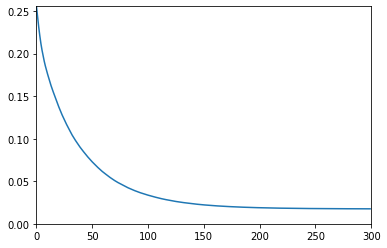

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training_cost)
plt.plot(range(len(training_cost)),training_cost)
plt.axis([0,step,0,np.max(training_cost)])
plt.show()

In [ ]:


# pred_y = sess.run(y_, feed_dict={X: test_x})
# mse = tf.reduce_mean(tf.square(pred_y - test_y))
# print("MSE: %.4f" % sess.run(mse)) 

# fig, ax = plt.subplots()
# ax.scatter(test_y, pred_y)
# ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()